# Problem 1 Logistic Regression

## 1.1 Fit a logistic regression model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [58]:
class LogisticRegressionGD:
    def __init__(self, lr=0.01, fit_intercept=True, max_epoch=1e5, tolerance=1e-7, verbose=True):
        self.lr = lr
        self.fit_intercept = fit_intercept
        self.max_epoch = max_epoch
        self.tolerance = tolerance
        self.verbose = True

    def add_intercept(self, X):
        # add an extra column for the intercept
        intercept = np.ones([X.shape[0], 1])
        return np.concatenate((intercept, X), axis=1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, h, y):
        # calculate the loss
        # return the loss
        
        # TODO
        n = y.shape[0]
        return 1/n((y.T@(np.log(h)) + (1-y).T@(np.log(1-h)))[0])

    def fit(self, X, y):
        '''
        Parameters
        ----------
        X : shape (n_samples, n_features)
            Training data
        y : shape (n_samples,)
            Target values, 1 or 0
        epochs : The number of epochs
        '''

        # initialize the parameters
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        # initialize the coefficients
        self.theta = np.zeros(X.shape[1])

        tol = 1e10
        n_epoch = 1
        while tol > self.tolerance and n_epoch <= self.max_epoch:
            old_theta = self.theta.copy()
            
            # TODO:
            # calculate predictions
            # pred.shape: [n_samples, 1]
            pred = self.sigmoid(X@old_theta)
        
            # calculate gradients
            # grad.shape:  [n_features, 1]
            n = y.shape[0]
            grad = - (1/n)*(X.T@(y - pred)) 
        
            # update the coefficients
            self.theta = old_theta - self.lr * grad
            # END
            
            n_epoch += 1
            tol = np.sum(np.abs(self.theta - old_theta))

    def predict(self, X, threshold):
        """
        Parameters
        ----------
        X : shape (n_samples, n_features)
        threshold : threshold for make decision
        Returns
        -------
        y : shape (n_samples,)
            Predicted class label per sample, 1 or 0
        """
        # TODO
        
        # add the intercept to X
        X = self.add_intercept(X)
        # get the prediction y
        prediction = X@self.theta
        # return prediction y
        
        return np.int64(prediction>threshold)

In [59]:
# read the data, transform the target variable y to 0/1 values
# TODO
def proc_data():
    df_X = pd.read_csv("logistic_x.txt", sep="\s+", header=None)
    df_y = pd.read_csv("logistic_y.txt", header=None)

    df_X.columns = ['x1', 'x2']
    df_y.columns = ["y"]
    df_y["y"] = df_y["y"].replace({-1:0})

    X = df_X[['x1', 'x2']].values
    y = df_y['y'].values
    
    return X, y

X, y = proc_data ()


In [76]:
# fit the model using the data, and print out the model coefficients w
# we include the intercept term, so w is a vector with 3 components
# print out the model coeffcients
# TODO
model = LogisticRegressionGD()
model.fit(X, y)
print("The model coeffcients is:", model.theta)


The model coeffcients is: [-2.62004691  0.76026934  1.17191257]


## 1.2 Plot the training data and the decision boundary

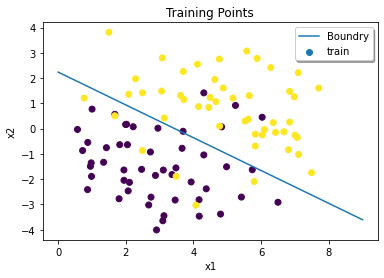

In [77]:
# plot the training data (x axis: first feature, y axis: second feature), use different labels for the two classes

# on the same figure, plot the boundary, a straight line showing the boundary separating p>0.5 from p<=0.5

# TODO

fig, ax = plt.subplots()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title("Training Points")
x_range = np.linspace(0,9,100)
coef = model.theta
y_range = -(coef[0]/coef[2]) - (coef[1]/coef[2])*x_range
ax.plot(x_range, y_range, label = "Boundry")
ax.scatter(X[:,0], X[:,1], label = "train", c=y)

legend = ax.legend(loc="best", shadow=True)